### Reference on kaggle offical codeing:

[Understanding the data + Catalyst/Kekas baseline](https://www.kaggle.com/code/nxrprime/understanding-the-data-catalyst-kekas-baseline)\
[Lyft: Comprehensive guide to start competition](https://www.kaggle.com/code/corochann/lyft-comprehensive-guide-to-start-competition)\
[Lyft: Deep into the l5kit library](https://www.kaggle.com/code/corochann/lyft-deep-into-the-l5kit-library)\
[Lyft: Complete train and prediction pipeline](https://www.kaggle.com/code/huanvo/lyft-complete-train-and-prediction-pipeline)\
[Pytorch Baseline - Inference](https://www.kaggle.com/code/pestipeti/pytorch-baseline-inference)
[Lyft Level5: EDA + Training + Inference](https://www.kaggle.com/code/kool777/lyft-level5-eda-training-inference)




### improvement I do for this coding:
* reweight model Architecture
* data augmentation 

# 0. <a id='0'>Introduction📃</a>


This competition is hosted by ridesharing company [Lyft](https://www.lyft.com/) which started [Level 5](https://self-driving.lyft.com/level5/), self-driving division to tackle the challenges in the field of self-driving cars. 

In this competition our task is to build motion prediction models for self-driving vehicles. Model which can predict the movement of traffic agents around the Autonomous Vehicles such as cars, cyclists, and pedestrians etc. We are required to predict how these different agents move in Autonomous Vehicles's environment.

## Competition Data

This [dataset](https://www.kaggle.com/c/lyft-motion-prediction-autonomous-vehicles/data) is the largest collection of the traffic agent motion data. This dataset includes the logs of movement of cars, cyclists, pedestrians, and other traffic agents encountered by Lyft's autonomous fleet. These logs come from processing raw lidar, camera, and radar data through our team’s perception systems and are ideal for training motion prediction models. The dataset includes:

* 1000+ hours of traffic agent movement
* 16k miles of data from 23 vehicle
* 15k semantic map annotations

Here is the reserach paper of [Prediction Dataset](https://paperswithcode.com/paper/one-thousand-and-one-hours-self-driving).

The dataset consists of 170,000 scenes capturing the environment around the autonomous vehicle. Each scene encodes the state of the vehicle’s surroundings at a given point in time. [source](https://self-driving.lyft.com/level5/prediction/)

<div style="clear:both;display:table">
<img src="https://self-driving.lyft.com/wp-content/uploads/2020/06/motion_dataset_lrg_redux.gif" style="width:45%;float:left"/>
<img src="https://self-driving.lyft.com/wp-content/uploads/2020/06/motion_dataset_2-1.png" style="width:45%;float:left"/>
</div>
<br/>

This baseline solution is trained on over 2 million samples from the agent locations contained within the dataset. The model predicts a single agent at a time. First, a raster generates a bird’s eye view (BEV) top-down raster, which encodes all agents and the map. The network infers the future coordinates of the agent-based upon this raster.

<img src="https://self-driving.lyft.com/wp-content/uploads/2020/06/diagram-prediction-1.jpg" style="width:70%"/>
<br/>
    
## What we are predicting?

Our task in the competition is to predict the motion of external objects such as cars, cyclist, pedestrains etc in order to assist the self-driving car. We have to predict the location of objects agents in the next 50 frames.

## Evaluation Metric: Negative log-likelihood

We calculate the negative log-likelihood of the ground truth data given the multi-modal predictions. You can get more information [here](https://www.kaggle.com/c/lyft-motion-prediction-autonomous-vehicles/overview/evaluation).


![](https://camo.githubusercontent.com/b3634eea5be5501318957e21086781666018efa1/68747470733a2f2f6c617465782e636f6465636f67732e636f6d2f6769662e6c617465783f25354362675f77686974652532302535436c617267652532304c2532302533442532302d2532302535436c6f6725323070253238785f253742312532432532302535436c646f747325324325323054253744253243253230795f253742312532432532302535436c646f74732532432532305425374425374363253545253742312532432532302535436c646f74732532432532304b253744253243253230253543626172253742782537445f253742312532432532302535436c646f747325324325323054253744253545253742312532432532302535436c646f74732532432532304b253744253243253230253543626172253742792537445f253742312532432532302535436c646f747325324325323054253744253545253742312532432532302535436c646f74732532432532304b253744253239)
![](https://camo.githubusercontent.com/8048a110a20827715a17eb76f8039302a576d503/68747470733a2f2f6c617465782e636f6465636f67732e636f6d2f6769662e6c617465783f25354362675f77686974652532302535436c617267652532302533442532302d2532302535436c6f6725323025354373756d5f6b253230652535452537422535436c6f67253238632535456b2532392532302b25323025354373756d5f742532302535436c6f672532302535436d61746863616c2537424e253744253238785f74253743253543626172253742782537445f742535456b2532432532302535437369676d61253344312532392532302535436d61746863616c2537424e253744253238795f74253743253543626172253742792537445f742535456b2532432532302535437369676d6125334431253239253744)
![](https://camo.githubusercontent.com/9ba94f5c0c40666d66b93fba994cc5f7623ebd98/68747470733a2f2f6c617465782e636f6465636f67732e636f6d2f6769662e6c617465783f25354362675f77686974652532302535436c617267652532302533442532302d2532302535436c6f6725323025354373756d5f6b253230652535452537422535436c6f67253238632535456b2532392532302d25354366726163253742312537442537423225374425323025354373756d5f74253230253238253543626172253742782537445f742535456b2532302d253230785f74253239253545322532302b253230253238253543626172253742792537445f742535456b2532302d253230795f7425323925354532253744)

# 1. <a id='1'>Import Packages📚</a>

We are required to use [L5Kit toolkit](https://github.com/lyft/l5kit) provided by the competition host to prepare/preprocess data, trian and evaluate the model. Please add this [utility script](https://www.kaggle.com/pestipeti/lyft-l5kit-unofficial-fix) provided by [Peter's](https://www.kaggle.com/pestipeti) first by clicking on the [+ Add data]() section inside your notebook before starting. The [L5Kit toolkit](https://github.com/lyft/l5kit) has some issue right now. You can check [this](https://www.kaggle.com/c/lyft-motion-prediction-autonomous-vehicles/discussion/177125) discussion here for more information.  

## L5Kit is a library which lets you:

* Load driving scenes from zarr files
* Read semantic maps
* Read aerial maps
* Create birds-eye-view (BEV) images which represent a scene around an AV or another vehicle
* Sample data
* Train neural networks
* Visualize results

In [1]:
# import packages
import os, gc
import zarr
import numpy as np 
import pandas as pd 
from tqdm import tqdm
from typing import Dict
from collections import Counter
from prettytable import PrettyTable

#level5 toolkit
from l5kit.data import PERCEPTION_LABELS
from l5kit.dataset import EgoDataset, AgentDataset
from l5kit.data import ChunkedDataset, LocalDataManager

# level5 toolkit 
from l5kit.configs import load_config_data
from l5kit.geometry import transform_points
from l5kit.rasterization import build_rasterizer
from l5kit.visualization import draw_trajectory, draw_reference_trajectory, TARGET_POINTS_COLOR
from l5kit.evaluation import write_pred_csv, compute_metrics_csv, read_gt_csv, create_chopped_dataset

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation
from colorama import Fore, Back, Style

# deep learning
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision.models.resnet import resnet18, resnet50, resnet34

# check files in directory
print((os.listdir('../input/lyft-motion-prediction-autonomous-vehicles/')))

plt.rc('animation', html='jshtml')

%matplotlib inline

['multi_mode_sample_submission.csv', 'semantic_map', 'aerial_map', 'single_mode_sample_submission.csv', 'meta.json', 'scenes']


# 3. <a id='3'>EDA🔍</a>

The data is huge around 22 GB. We will use Lyft's [L5Kit](https://github.com/lyft/l5kit) to process our data (loading and visualization) and training. 


### <a id='3-1-2'>Zarr Format</a>

The L5Kit uses zarr format to store and read these structured numpy arrays. The data is available in .zarr file format which can be easily load using the [L5Kit](https://github.com/lyft/l5kit). Most of the traditional numpy operations can be handled using .zarr files. The zarr files are flat, compact, and highly performant for loading. Each of the .zarr file contains - 

   * scenes: driving episodes acquired from a given vehicle.
   * frames: snapshots in time of the pose of the vehicle. A frame is a snapshot in time which consists of ego pose, time, and multiple agent states.
   * agents: a generic entity captured by the vehicle's sensors. Note that only 4 of the 17 possible agent label_probabilities are present in this dataset. Each agent state describes the position, orientation, bounds, and type.
   * agents_mask: a mask that (for train and validation) masks out objects that aren't useful for training. In test, the mask (provided in files as mask.npz) masks out any test object for which predictions are NOT required.
   * traffic_light_faces: traffic light information.


### <a id='3-1-3'>Train, Validation And Test Zarr</a>

In [2]:
train = zarr.open("../input/lyft-motion-prediction-autonomous-vehicles/scenes/train.zarr")
validation = zarr.open("../input/lyft-motion-prediction-autonomous-vehicles/scenes/validate.zarr")
test = zarr.open("../input/lyft-motion-prediction-autonomous-vehicles/scenes/test.zarr/")
train.info

Name,/
Type,zarr.hierarchy.Group
Read-only,False
Store type,zarr.storage.DirectoryStore
No. members,5
No. arrays,4
No. groups,1
Arrays,"agents, frames, scenes, traffic_light_faces"
Groups,agents_mask


The data is expected to live in a folder that can be configured using the L5KIT_DATA_FOLDER env variable. We will now develop some intuition about the data.

In [3]:
# set env variable for data
os.environ["L5KIT_DATA_FOLDER"] = "../input/lyft-motion-prediction-autonomous-vehicles"

# get configuration yaml
cfg = load_config_data("../input/lyft-config-files/visualisation_config.yaml")
print(cfg)

{'format_version': 4, 'model_params': {'model_architecture': 'resnet50', 'history_num_frames': 0, 'history_step_size': 1, 'history_delta_time': 0.1, 'future_num_frames': 50, 'future_step_size': 1, 'future_delta_time': 0.1}, 'raster_params': {'raster_size': [224, 224], 'pixel_size': [0.5, 0.5], 'ego_center': [0.25, 0.5], 'map_type': 'py_semantic', 'satellite_map_key': 'aerial_map/aerial_map.png', 'semantic_map_key': 'semantic_map/semantic_map.pb', 'dataset_meta_key': 'meta.json', 'filter_agents_threshold': 0.5}, 'val_data_loader': {'key': 'scenes/sample.zarr', 'batch_size': 12, 'shuffle': False, 'num_workers': 16}}


## <a id='3-3'>Loading Data</a>

In [4]:
dm = LocalDataManager()
dataset_path = dm.require(cfg["val_data_loader"]["key"])
zarr_dataset = ChunkedDataset(dataset_path)
zarr_dataset.open()
print(zarr_dataset)

+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+
| Num Scenes | Num Frames | Num Agents | Num TR lights | Total Time (hr) | Avg Frames per Scene | Avg Agents per Frame | Avg Scene Time (sec) | Avg Frame frequency |
+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+
|    100     |   24838    |  1893736   |     316008    |       0.69      |        248.38        |        76.24         |        24.83         |        10.00        |
+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+


In [5]:
print(dataset_path)

../input/lyft-motion-prediction-autonomous-vehicles/scenes/sample.zarr


We are going to load our sample.zarr file. The 2020 Lyft competition dataset is stored in four structured arrays: **scenes, frames, agents and tl_faces**. 

## <a id='3-4'>Data Overview</a>

We will see each field inside the zarr files. (train, validation and test). We will use **sample.zarr** here. 

#### <a id='3-4-1'>Agents</a>

An agent is an observation by the AV of some other detected object. Each entry describes the object in terms of its attributes such as position and velocity, gives the agent a tracking number to track it over multiple frames (but only within the same scene!) and its most probable label.

In [6]:
agents = pd.DataFrame.from_records(zarr_dataset.agents, columns = ['centroid', 'extent', 'yaw', 'velocity', 'track_id', 'label_probabilities'])
agents.head()

,centroid,extent,yaw,velocity,track_id,label_probabilities
0,"[665.0342407226562, -2207.51220703125]","[4.3913283, 1.8138304, 1.5909758]",1.016675,"[0.0, 0.0]",1,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[717.6612548828125, -2173.760009765625]","[5.150925, 1.9530917, 2.04021]",-0.783224,"[0.0, 0.0]",2,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[730.681396484375, -2180.678955078125]","[2.9482825, 1.4842174, 1.1125067]",-0.321747,"[0.0, 0.0]",3,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[671.2536010742188, -2204.745361328125]","[1.7067024, 0.9287868, 0.6282158]",0.785501,"[0.0, 0.0]",4,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[669.7763061523438, -2213.004638671875]","[0.25109944, 0.6343781, 1.654377]",1.492359,"[0.0, 0.0]",5,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


**📌 Points to note :**
   * **centroid** - position of agent
   * **extent** - agent dimension
   * **yaw** - rotation of an agent with respect to vertical axis. A yaw rotation is a movement around the yaw axis of a rigid body that changes the direction it is pointing, to the left or right of its direction of motion.
   * **velocity** - speed of the agent 
   * **track_id** - unique id to track agent in different frames
   * **label_probabilities** - prabability an agent belong to one of the 17 classes. (We are only given three labels [cyclist, pedestrians and cars])

#### <a id='3-4-2'>Scenes</a>

A scene is identified by the host (i.e. which car was used to collect it) and a start and end time. It consists of multiple frames (=snapshots at discretized time intervals). The scene datatype stores references to its corresponding frames in terms of the start and end index within the frames array (described in dataframe below). The frames in between these indices all correspond to the scene (including start index, excluding end index).

In [7]:
scenes = pd.DataFrame.from_records(zarr_dataset.scenes, columns = ['frame_index_interval', 'host', 'start_time', 'end_time'])
scenes.head()

,frame_index_interval,host,start_time,end_time
0,"[0, 248]",host-a013,1572643684617362176,1572643709617362176
1,"[248, 497]",host-a013,1572643749559148288,1572643774559148288
2,"[497, 746]",host-a013,1572643774559148288,1572643799559148288
3,"[746, 995]",host-a013,1572643799559148288,1572643824559148288
4,"[995, 1244]",host-a013,1572643824559148288,1572643849559148288


**📌 Points to note :**
   * **frame_index_interval** - frame index (including start index, excluding end index)
   * **host** - car used to collect data
   * **start_time** - start time of scene
   * **end_time** - end time of scene

#### <a id='3-4-3'>Frames</a>

A frame captures all information that was observed at a time. This includes the following fields as mentioned in dataframe below.

In [8]:
frames = pd.DataFrame.from_records(zarr_dataset.frames, columns = ['timestamp', 'agent_index_interval', 'traffic_light_faces_index_interval', 'ego_translation','ego_rotation'])
frames.head()

,timestamp,agent_index_interval,traffic_light_faces_index_interval,ego_translation,ego_rotation
0,1572643684801892606,"[0, 38]","[0, 0]","[680.6197509765625, -2183.32763671875, 288.541...","[[0.5467331409454346, -0.837294340133667, 0.00..."
1,1572643684901714926,"[38, 85]","[0, 0]","[681.1856079101562, -2182.42236328125, 288.608...","[[0.5470812916755676, -0.837059736251831, 0.00..."
2,1572643685001499246,"[85, 142]","[0, 0]","[681.7647094726562, -2181.522705078125, 288.68...","[[0.5479603409767151, -0.8364874720573425, 0.0..."
3,1572643685101394026,"[142, 200]","[0, 0]","[682.3414306640625, -2180.624267578125, 288.75...","[[0.5491225123405457, -0.8357341885566711, 0.0..."
4,1572643685201412346,"[200, 254]","[0, 0]","[682.9197998046875, -2179.73046875, 288.827392...","[[0.5504215955734253, -0.8348868489265442, -7...."


**📌 Points to note :**
   * **timestamp** - frame's timestamp
   * **agent_index_interval** - agents (vehicles, cyclists and pedestrians) that were captured by the ego's sensors
   * **traffic_light_faces_index_interval** - traffic light index
   * **ego_translation** - position of host car.
   * **ego_rotation** - rotation of host car (which is collecting data using ego sensors)

#### <a id='3-4-3'>Traffic Light Faces</a>

The traffic light bulbs (red, green, yellow) are refered as **face**.

In [9]:
traffic_light_faces = pd.DataFrame.from_records(zarr_dataset.tl_faces, columns = ['face_id', 'traffic_light_id', 'traffic_light_face_status'])
traffic_light_faces.head()

,face_id,traffic_light_id,traffic_light_face_status
0,xbVG,/ggb,"[0.0, 0.0, 1.0]"
1,jutE,/ggb,"[0.0, 0.0, 1.0]"
2,CDDo,/ggb,"[0.0, 0.0, 1.0]"
3,xbVG,/ggb,"[0.0, 0.0, 1.0]"
4,jutE,/ggb,"[0.0, 0.0, 1.0]"


   * **face_id** - unique id for traffic light bulb
   * **traffic_light_id** - traffic light status
   * **traffic_light_face_status** - out of red/green/yellow which face is active/unactive/unknown

## <a id='3-5'>Dataset Package</a>

The dataset package, for example, already implements PyTorch ready datasets, so you can hit the ground running and start coding immediately. There are two classes in the dataset package. We will be using below two datasets classes to generate inputs and targets.

   * EgoDataset: this dataset iterates over the AV annotations
   * AgentDataset: this dataset iterates over other agents annotations
   
Both of them can be iterated and return multi-channel images from the rasterizer along with future trajectories offsets and other information. We will see ahead about **rasterizer and trajectories** soon.

We need **cfg**, **Zarr-Dataset(ChunkedDataset)** and **rasterizer** object to instantiate these.

#### <a name='3-5-1'>ChunckedDataset</a>

The **[ChunckedDataset](#0.2)**(click) class as you can see above returned four structured arrays, scenes, frames, agents and tl_faces, all are described above in detail. Both the **EgoDataset and AgentDataset** are using **zarr dataset** object which is made using **[ChunckedDataset](#0.2)**. 


## <a id='3-6'>Visualize Autonomous Vehicle🚙</a>

Now we will look into the visualisation utility of [L5Kit Toolkit](https://github.com/lyft/l5kit). There are two core packages for visualisation:

* **rasterization** - contains classes for getting visual data as multi-channel tensors and turning them into interpretable RGB images. We will talk about these classes in detail shortly. Each class inside this [rasterization](https://github.com/lyft/l5kit/tree/master/l5kit/l5kit/rasterization) package conatin has at least a **rasterize** method to get the tensor and a **to_rgb** method to convert it into an image. 

    * BoxRasterizer: this object renders agents (e.g. vehicles or pedestrians) as oriented 2D boxes.
    * StubRasterizer: this object doesn't do anything. It return all black image and can be used for testing.
    * SatelliteRasterizer: this object renders an oriented crop from a satellite map.
    * SatBoxRasterizer: this object combine a **Satellite** and a **Box Rasterizers** into a single class. You can visualize agents (e.g. vehicles or pedestrians) as oriented 2D boxes in a satellite image.
    * SemanticRasterizer: this object renders semantic map which contains lane & crosswalk information.
    * SemBoxRasterizer: this object combine a **Semantic Map** and a **Box Rasterizers** into a single class. You can visualize agents (e.g. vehicles or pedestrians) as oriented 2D boxes in a semantic image.
    
To instantiate each of these object we will use **build_rasterizer** method.
   
   
* **visualization** - contains utilities to draw additional information (e.g. trajectories) onto RGB images. These utilities are commonly used after a **to_rgb** call to add other information to the final visualisation. Following utilities are available.
   
   * draw_arrowed_line: Draw a single arrowed line in an RGB image.
   * draw_trajectory: Draw a trajectory on oriented arrow onto an RGB image.
   * draw_reference_trajectory: Draw a trajectory (as points) onto the image.

### <a id='3-6-1'> Visualizing Various Rasterizer Objects**</a>

Visualize different raster objects.

/kaggle/usr/lib/lyft-l5kit-unofficial-fix/l5kit/dataset/ego.py:152: RuntimeWarning: disable_traffic_light_faces not found in config, this will raise an error in the future
  return self.get_frame(scene_index, state_index)


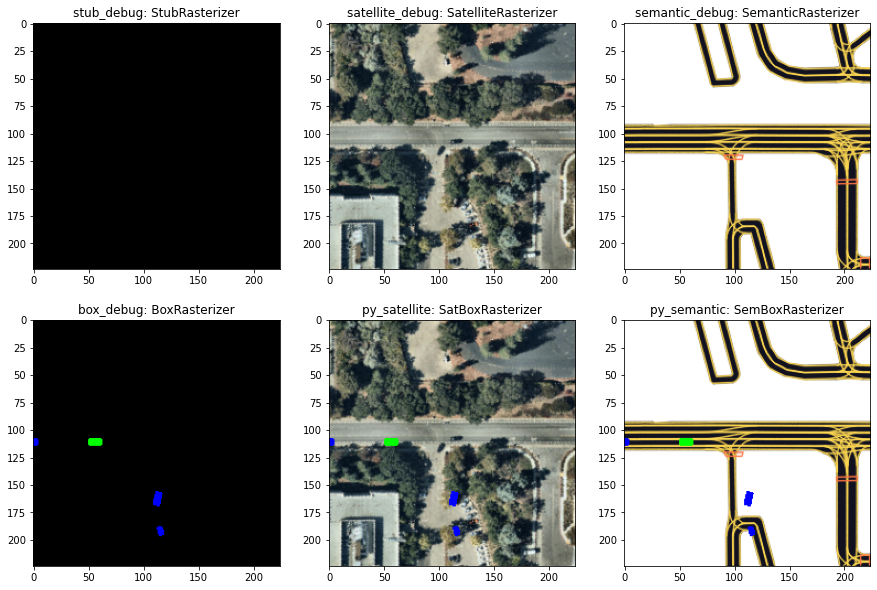

In [10]:
sns.set_style({'axes.grid': False})

def visualize_rgb_image(dataset, index, title="", ax=None):
    """Visualizes Rasterizer's RGB image"""
    data = dataset[index]
    im = data["image"].transpose(1, 2, 0)
    im = dataset.rasterizer.to_rgb(im)

    if ax is None:
        fig, ax = plt.subplots()
    if title:
        ax.set_title(title)
    ax.imshow(im[::-1])
# Prepare all rasterizer and EgoDataset for each rasterizer
rasterizer_dict = {}
dataset_dict = {}

rasterizer_type_list = ["py_satellite", "satellite_debug", "py_semantic", "semantic_debug", "box_debug", "stub_debug"]

for i, key in enumerate(rasterizer_type_list):
    # print("key", key)
    cfg["raster_params"]["map_type"] = key
    rasterizer_dict[key] = build_rasterizer(cfg, dm)
    dataset_dict[key] = EgoDataset(cfg, zarr_dataset, rasterizer_dict[key])
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, key in enumerate(["stub_debug", "satellite_debug", "semantic_debug", "box_debug", "py_satellite", "py_semantic"]):
    visualize_rgb_image(dataset_dict[key], index=0, title=f"{key}: {type(rasterizer_dict[key]).__name__}", ax=axes[i])
fig.show()

# <a id='4'>Pytorch Baseline 🔦</a>

In [11]:
DEBUG = True

# training cfg
training_cfg = {
    
    'format_version': 4,
    
     ## Model options
    'model_params': {
        'model_architecture': 'resnet34',
        'history_num_frames': 10,
        'history_step_size': 1,
        'history_delta_time': 0.1,
        'future_num_frames': 50,
        'future_step_size': 1,
        'future_delta_time': 0.1,
    },

    ## Input raster parameters
    'raster_params': {
        
        'raster_size': [224, 224], # raster's spatial resolution [meters per pixel]: the size in the real world one pixel corresponds to.
        'pixel_size': [0.5, 0.5], # From 0 to 1 per axis, [0.5,0.5] would show the ego centered in the image.
        'ego_center': [0.25, 0.5],
        'map_type': "py_semantic",
        
        # the keys are relative to the dataset environment variable
        'satellite_map_key': "aerial_map/aerial_map.png",
        'semantic_map_key': "semantic_map/semantic_map.pb",
        'dataset_meta_key': "meta.json",

        # e.g. 0.0 include every obstacle, 0.5 show those obstacles with >0.5 probability of being
        # one of the classes we care about (cars, bikes, peds, etc.), >=1.0 filter all other agents.
        'filter_agents_threshold': 0.5
    },

    ## Data loader options
    'train_data_loader': {
        'key': "scenes/train.zarr",
        'batch_size': 12,
        'shuffle': True,
        'num_workers': 4
    },

    ## Train params
    'train_params': {
        'checkpoint_every_n_steps': 5000,
        'max_num_steps': 100 if DEBUG else 10000
    }
}

# inference cfg
inference_cfg = {
    
    'format_version': 4,
    'model_params': {
        'history_num_frames': 10,
        'history_step_size': 1,
        'history_delta_time': 0.1,
        'future_num_frames': 50,
        'future_step_size': 1,
        'future_delta_time': 0.1
    },
    
    'raster_params': {
        'raster_size': [300, 300],
        'pixel_size': [0.5, 0.5],
        'ego_center': [0.25, 0.5],
        'map_type': 'py_semantic',
        'satellite_map_key': 'aerial_map/aerial_map.png',
        'semantic_map_key': 'semantic_map/semantic_map.pb',
        'dataset_meta_key': 'meta.json',
        'filter_agents_threshold': 0.5
    },
    
        'test_data_loader': {
        'key': 'scenes/test.zarr',
        'batch_size': 8,
        'shuffle': False,
        'num_workers': 4
    }

}

## <a id='4-2'>Loading Training Data</a>


In [12]:
# root directory
DIR_INPUT = "/kaggle/input/lyft-motion-prediction-autonomous-vehicles"

#submission
SINGLE_MODE_SUBMISSION = f"{DIR_INPUT}/single_mode_sample_submission.csv"
MULTI_MODE_SUBMISSION = f"{DIR_INPUT}/multi_mode_sample_submission.csv"

# set env variable for data
os.environ["L5KIT_DATA_FOLDER"] = DIR_INPUT
dm = LocalDataManager(None)
print(training_cfg)

{'format_version': 4, 'model_params': {'model_architecture': 'resnet34', 'history_num_frames': 10, 'history_step_size': 1, 'history_delta_time': 0.1, 'future_num_frames': 50, 'future_step_size': 1, 'future_delta_time': 0.1}, 'raster_params': {'raster_size': [224, 224], 'pixel_size': [0.5, 0.5], 'ego_center': [0.25, 0.5], 'map_type': 'py_semantic', 'satellite_map_key': 'aerial_map/aerial_map.png', 'semantic_map_key': 'semantic_map/semantic_map.pb', 'dataset_meta_key': 'meta.json', 'filter_agents_threshold': 0.5}, 'train_data_loader': {'key': 'scenes/train.zarr', 'batch_size': 12, 'shuffle': True, 'num_workers': 4}, 'train_params': {'checkpoint_every_n_steps': 5000, 'max_num_steps': 100}}


## <a id='4-3'>Training DataLoader</a>


In [13]:
# training cfg
train_cfg = training_cfg["train_data_loader"]

# rasterizer
rasterizer = build_rasterizer(training_cfg, dm)

# dataloader
train_zarr = ChunkedDataset(dm.require(train_cfg["key"])).open()
train_dataset = AgentDataset(training_cfg, train_zarr, rasterizer)
train_dataloader = DataLoader(train_dataset, shuffle=train_cfg["shuffle"], batch_size=train_cfg["batch_size"], 
                             num_workers=train_cfg["num_workers"])
print(train_dataset)

+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+
| Num Scenes | Num Frames | Num Agents | Num TR lights | Total Time (hr) | Avg Frames per Scene | Avg Agents per Frame | Avg Scene Time (sec) | Avg Frame frequency |
+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+
|   16265    |  4039527   | 320124624  |    38735988   |      112.19     |        248.36        |        79.25         |        24.83         |        10.00        |
+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+


## <a id='4-4'>Model: resnet50 (Pytorch)</a>

Here I chosse resnet50 be the backbone model,what is different from others is that I modified the final dropout process and verified and screened out the differences with other backbone models, and finally came to the conclusion of resnet50.

In [14]:
class LyftModel(nn.Module):
    
    def __init__(self, cfg):
        super().__init__()
        
        # set pretrained=True while training
        self.backbone = resnet34(pretrained=False) 
        
        num_history_channels = (cfg["model_params"]["history_num_frames"] + 1) * 2
        num_in_channels = 3 + num_history_channels

        self.backbone.conv1 = nn.Conv2d(
            num_in_channels,
            self.backbone.conv1.out_channels,
            kernel_size=self.backbone.conv1.kernel_size,
            stride=self.backbone.conv1.stride,
            padding=self.backbone.conv1.padding,
            bias=False,
        )
        
        # This is 512 for resnet18 and resnet34;
        # And it is 2048 for the other resnets
        backbone_out_features = 512
        
        # X, Y coords for the future positions (output shape: Bx50x2)
        num_targets = 2 * cfg["model_params"]["future_num_frames"]

        # You can add more layers here.
        self.head = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(in_features=backbone_out_features, out_features=4096),
        )

        self.logit = nn.Linear(4096, out_features=num_targets)
        
    def forward(self, x):
        x = self.backbone.conv1(x)
        x = self.backbone.bn1(x)
        x = self.backbone.relu(x)
        x = self.backbone.maxpool(x)

        x = self.backbone.layer1(x)
        x = self.backbone.layer2(x)
        x = self.backbone.layer3(x)
        x = self.backbone.layer4(x)

        x = self.backbone.avgpool(x)
        x = torch.flatten(x, 1)
        
        x = self.head(x)
        x = self.logit(x)
        
        return x

## <a id='4-5'>Compilation</a>

In [15]:
# compiling model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = LyftModel(training_cfg).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss(reduction="none")

In [16]:
# get hardware type (CPU, GPU, TPU)
device

device(type='cuda', index=0)

## <a id='4-6'>Training</a>

In [17]:
# training loop
tr_it = iter(train_dataloader)
progress_bar = tqdm(range(training_cfg["train_params"]["max_num_steps"]))

losses_train = []

for _ in progress_bar:
    try:
        data = next(tr_it)
    except StopIteration:
        tr_it = iter(train_dataloader)
        data = next(tr_it)
    model.train()
    torch.set_grad_enabled(True)
    
    # forward pass
    inputs = data["image"].to(device)
    target_availabilities = data["target_availabilities"].unsqueeze(-1).to(device)
    targets = data["target_positions"].to(device)
    
    outputs = model(inputs).reshape(targets.shape)
    loss = criterion(outputs, targets)

    # not all the output steps are valid, but we can filter them out from the loss using availabilities
    loss = loss * target_availabilities
    loss = loss.mean()
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses_train.append(loss.item())
        
    progress_bar.set_description(f"loss: {loss.item()} loss(avg): {np.mean(losses_train)}")

  0%|          | 0/100 [00:00<?, ?it/s]/kaggle/usr/lib/lyft-l5kit-unofficial-fix/l5kit/dataset/agent.py:115: RuntimeWarning: disable_traffic_light_faces not found in config, this will raise an error in the future
  return self.get_frame(scene_index, state_index, track_id=track_id)
/kaggle/usr/lib/lyft-l5kit-unofficial-fix/l5kit/dataset/agent.py:115: RuntimeWarning: disable_traffic_light_faces not found in config, this will raise an error in the future
  return self.get_frame(scene_index, state_index, track_id=track_id)
/kaggle/usr/lib/lyft-l5kit-unofficial-fix/l5kit/dataset/agent.py:115: RuntimeWarning: disable_traffic_light_faces not found in config, this will raise an error in the future
  return self.get_frame(scene_index, state_index, track_id=track_id)
/kaggle/usr/lib/lyft-l5kit-unofficial-fix/l5kit/dataset/agent.py:115: RuntimeWarning: disable_traffic_light_faces not found in config, this will raise an error in the future
  return self.get_frame(scene_index, state_index, track_id

In [18]:
# save full trained model
torch.save(model.state_dict(), f'model_state_last.pth')